### **Project: Bank Customer Segmentation & Targeted Marketing**

### Exploratory Data Analysis (EDA) and Insights

### Objective:
- The goal of this project is to analyze customer behavior for segmentation and marketing purposes. 
- We aim to identify key patterns, outliers, and correlations within the dataset to better understand customer spending habits, their relationship with various features, and opportunities for feature engineering.

#### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings 
warnings.filterwarnings('ignore')

#### Checking project directory

In [4]:
os.getcwd()

'e:\\My_Portfolio_Projects\\Bank-Customer-Segmentation-Targeted-Marketing-for-Wealth-Management\\notebooks'

#### importing dataset 

In [3]:
df = pd.read_csv('../data/raw/Bank_Customers_Dataset.csv')

## Data Overview

- **Rows**: 8,950 entries  
- **Columns**: 18 features  
  - **Data Types**:  
    - Object: 1 (`CUST_ID`)  
    - Integer: 3 (`CASH_ADVANCE_TRX`, `PURCHASES_TRX`, `TENURE`)  
    - Float: 14 (like `BALANCE`, `PURCHASES`, `PAYMENTS`, etc.)  
- **Missing Values**:  
  - `CREDIT_LIMIT`: 1 missing value (~0.01%)  
  - `MINIMUM_PAYMENTS`: 313 missing values (~3.5%)  
- **Duplicates**: 0 (no duplicate rows)  

In [6]:
df.head(2)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [9]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
df.isnull().sum() / df.shape[0] * 100

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

In [11]:
df.duplicated().sum()

0

## Insights from Skewness and Kurtosis

### Key Observations
- **Spending**: 
  - `PURCHASES (Skew: 8.14, Kurt: 111.39)`: Most spend very little. A few spend a lot.
  - `ONEOFF_PURCHASES (Skew: 10.05, Kurt: 164.19)`: Almost no one buys big things once. Some do, and it’s huge.
  - `INSTALLMENTS_PURCHASES (Skew: 7.30, Kurt: 96.58)`: Most don’t pay in parts. A few pay big amounts this way.

- **Cash and Payments**: 
  - `CASH_ADVANCE (Skew: 5.17, Kurt: 52.90)`: Most don’t take cash. A few take a lot.
  - `MINIMUM_PAYMENTS (Skew: 13.62, Kurt: 283.99)`: Most pay small minimums. A few pay very big ones.
  - `PAYMENTS (Skew: 5.91, Kurt: 54.77)`: Most payments are small. Some are large.

- **How Often They Use It**: 
  - `PURCHASES_FREQUENCY (Skew: 0.06, Kurt: -1.64)`: Some buy a lot, some don’t. No clear group.
  - `BALANCE_FREQUENCY (Skew: -2.02, Kurt: 3.09)`: Most update their balance often. Few don’t.

- **Account Info**: 
  - `TENURE (Skew: -2.94, Kurt: 7.69)`: Most have accounts for a long time. Few are new.
  - `CREDIT_LIMIT (Skew: 1.52, Kurt: 2.84)`: Most have similar limits. Some have higher ones.

### Insights
1. **Most Are Quiet, Few Are Loud**: Most customers spend or borrow little. A few do a lot and stand out.
2. **They Stay Around**: Many keep their accounts long and use them often.
3. **Buying Is Mixed**: People buy at different rates—no one way.
4. **Look Closer**: Check the big spenders or payers. They might be special or problems.

In [ ]:
skew_df = df.skew(numeric_only=True).sort_values(ascending=False).reset_index()
skew_df.columns = ['Column', 'Skewness']
kurt_df = df.kurtosis(numeric_only=True).sort_values(ascending=False).reset_index()
kurt_df.columns = ['Column', 'Kurtosis']
skew_kurt_df = pd.merge(skew_df, kurt_df, on='Column').round(2)
skew_kurt_df

,Column,Skewness,Kurtosis
0,MINIMUM_PAYMENTS,13.62,283.99
1,ONEOFF_PURCHASES,10.05,164.19
2,PURCHASES,8.14,111.39
3,INSTALLMENTS_PURCHASES,7.30,96.58
4,PAYMENTS,5.91,54.77
5,CASH_ADVANCE_TRX,5.72,61.65
6,CASH_ADVANCE,5.17,52.90
7,PURCHASES_TRX,4.63,34.79
8,BALANCE,2.39,7.67
9,PRC_FULL_PAYMENT,1.94,2.43


## Boxplot Analysis (Univariate EDA - Outlier Detection)
Boxplots are used to visualize the spread and detect outliers in numerical features.

Outliers appear as points outside the whiskers.

Right-skewed distributions like ` BALANCE, PURCHASES, CASH_ADVANCE ` indicate a few customers have significantly higher values.

Frequency features like `BALANCE_FREQUENCY, PURCHASES_FREQUENCY` are mostly between 0 and 1, showing customer behavior consistency.

Transaction features like `PURCHASES_TRX, CASH_ADVANCE_TRX` show high variability and outliers.

`TENURE` is uniformly distributed with no outliers.

#### Actionable Insights:
- Consider handling outliers and skewed data with log transformations, capping, or scaling before clustering.



<Figure size 1600x800 with 0 Axes>

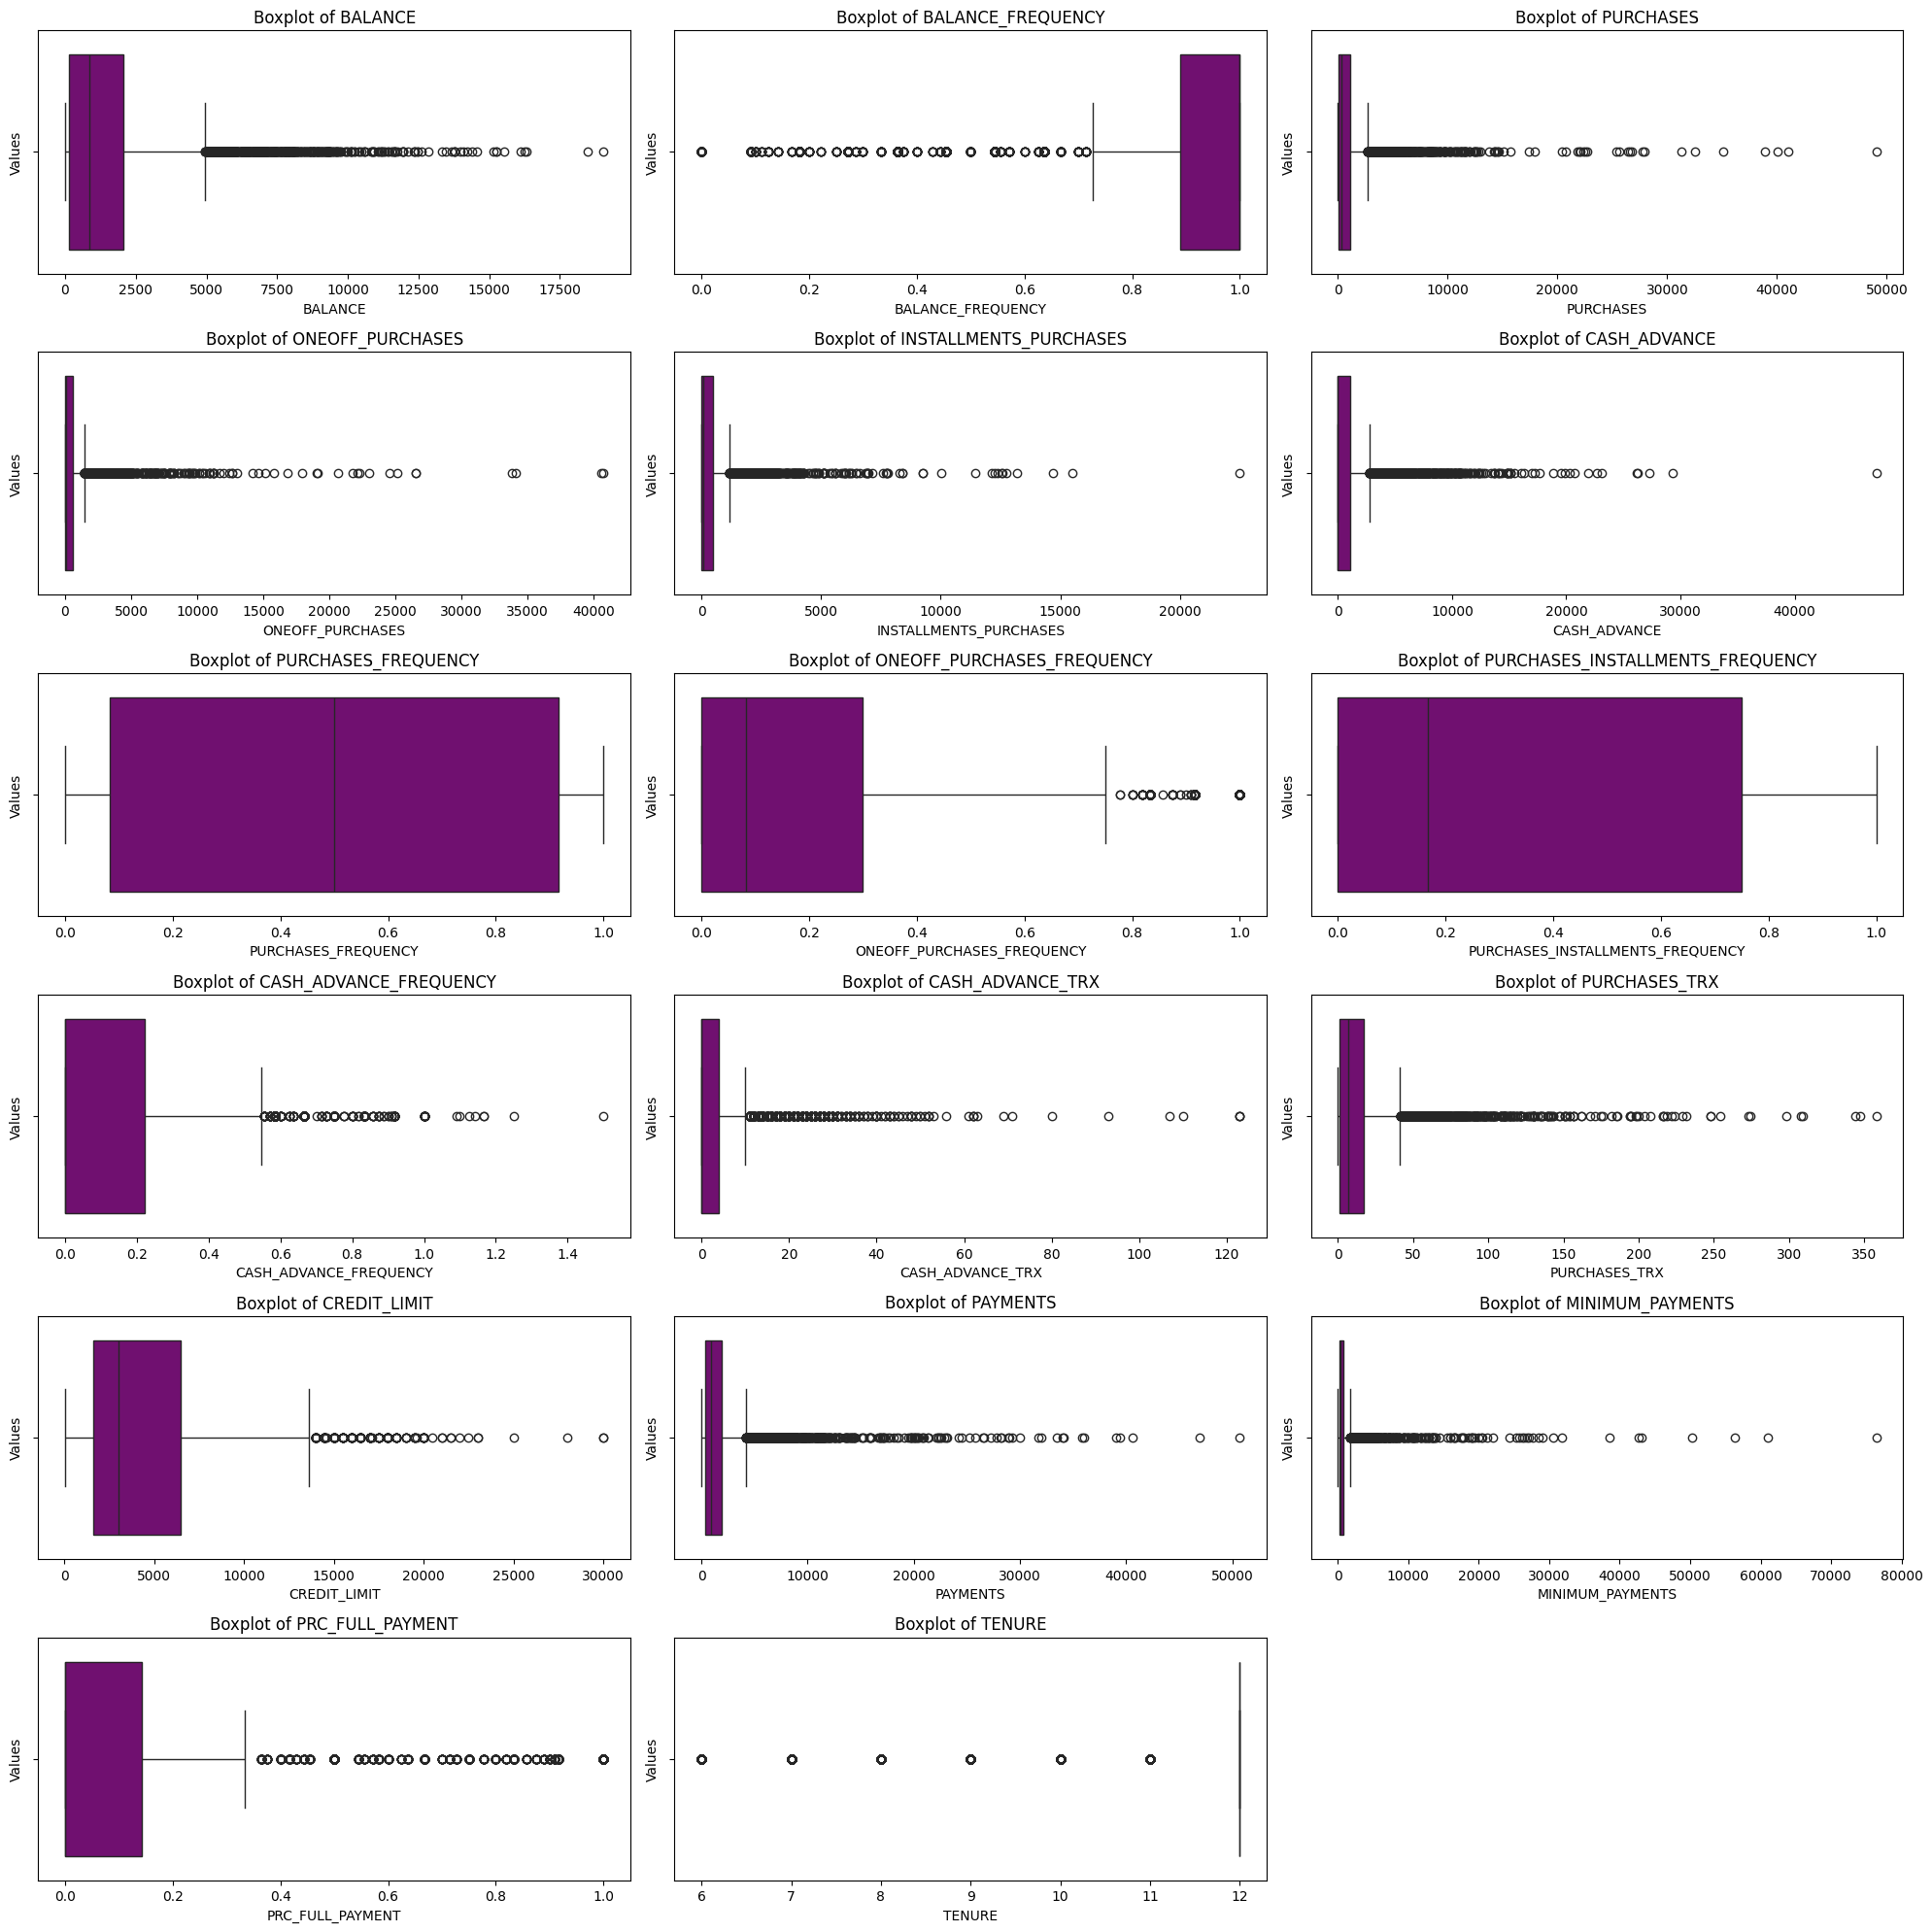

In [35]:
plt.figure(figsize=(16,8))
fig , axes = plt.subplots(6, 3 , figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(df.select_dtypes(include=['number']).columns):
    sns.boxplot(x=df[col], color = 'purple', ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Values')
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

## Correlation Heatmap (Multivariate EDA)
The heatmap shows pairwise correlations between numerical features to identify strong relationships:

Values near +1/-1 indicate strong positive/negative correlation.

**High positive correlations found:**

  - `ONEOFF_PURCHASES` & `PURCHASES`: 0.92

  - `PURCHASES` & `INSTALLMENTS_PURCHASES`: 0.68

  - `CASH_ADVANCE_TRX` & `CASH_ADVANCE_FREQUENCY`: 0.80

  - `CREDIT_LIMIT` & `BALANCE`: 0.53

Slight negative correlation between PRC_FULL_PAYMENT & BALANCE: -0.32

Most other features show weak or no correlation.

**Actionable Insight:**
   -  Helps reduce multicollinearity before modeling. Use PCA or drop highly correlated features if needed.

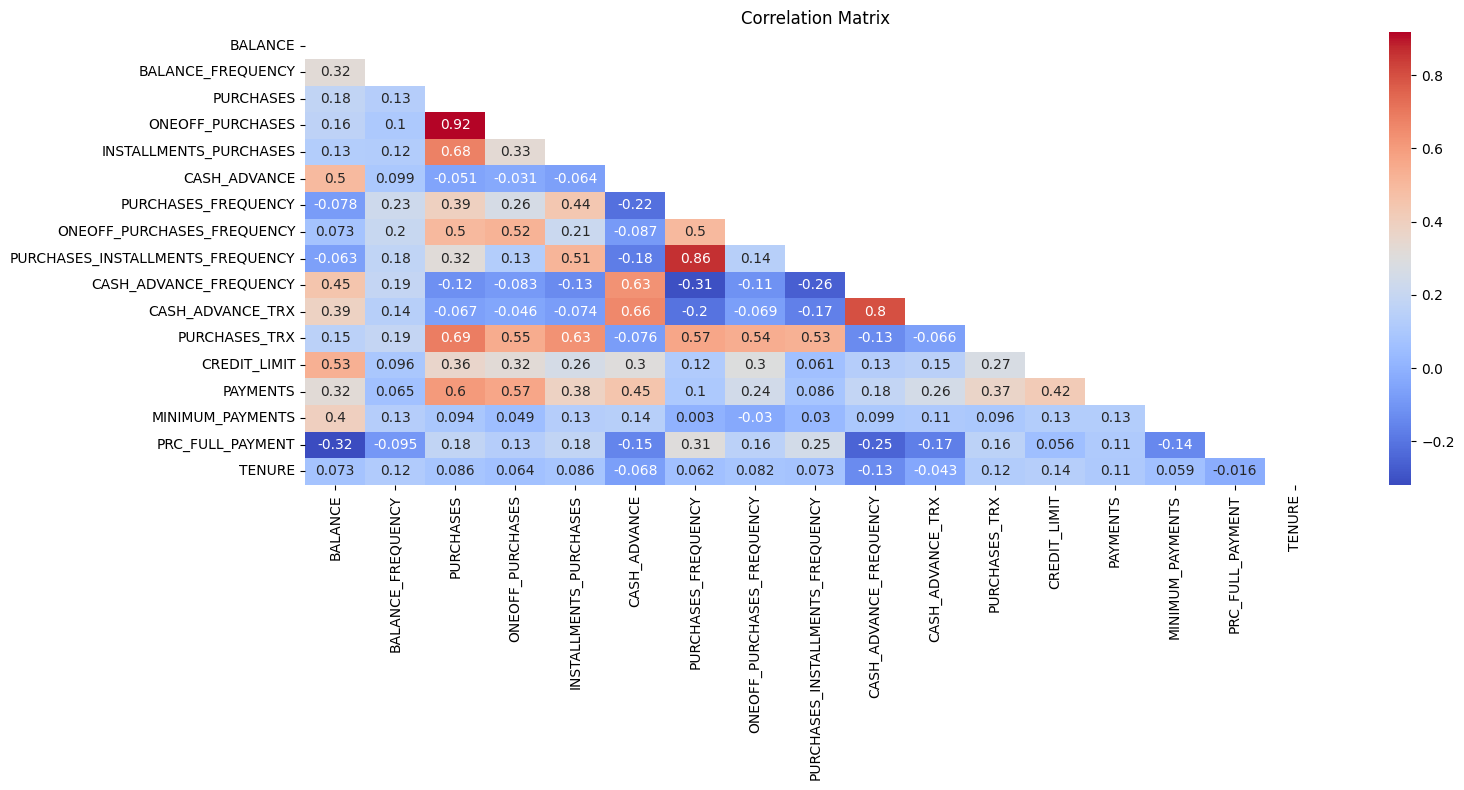

In [14]:
plt.figure(figsize=(16,8))
sns.heatmap(df.drop(['CUST_ID'], axis = 1).corr(), annot = True , cmap = 'coolwarm' , cbar = True ,
             mask = np.triu(np.ones_like(df.select_dtypes(include=['number']).corr(), dtype=bool)))
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

## Histograms for Distribution Analysis (Univariate EDA)
These histograms show how each number column spreads out

**Leaning Right (small values, few big ones):**
    - `BALANCE`, `PURCHASES`, `ONEOFF_PURCHASES`, `INSTALLMENTS_PURCHASES`, `CASH_ADVANCE`, `CASH_ADVANCE_TRX`, `PURCHASES_TRX`, `CREDIT_LIMIT`, `PAYMENTS`,    `MINIMUM_PAYMENTS`, `PRC_FULL_PAYMENT`—most are near 0, but some are huge like `PURCHASES` up to 50,000.
    
**Leaning Left (big values, few small ones):**
  - `BALANCE_FREQUENCY`, `TENURE`—most are high like `TENURE` mostly at 12 months.

**Even Spread:**
  - `PURCHASES_FREQUENCY`, `ONEOFF_PURCHASES_FREQUENCY`, `PURCHASES_INSTALLMENTS_FREQUENCY`, `CASH_ADVANCE_FREQUENCY`—values are all over, not leaning one way.

**Peaks and Big Values:**
   - Many `PURCHASES`, `CASH_ADVANCE` peak at 0—most don’t spend or borrow. But big outliers exist like `MINIMUM_PAYMENTS` at 80,000.

**Actionable Insights:**
   - Fix leaning columns like `PURCHASES` with math e.g. log for better models.
   - Check big outliers in `MINIMUM_PAYMENTS`—maybe remove them.
   - Even columns `PURCHASES_FREQUENCY` are good to go.
   - TENURE shows most customers stay long.

<Figure size 1600x800 with 0 Axes>

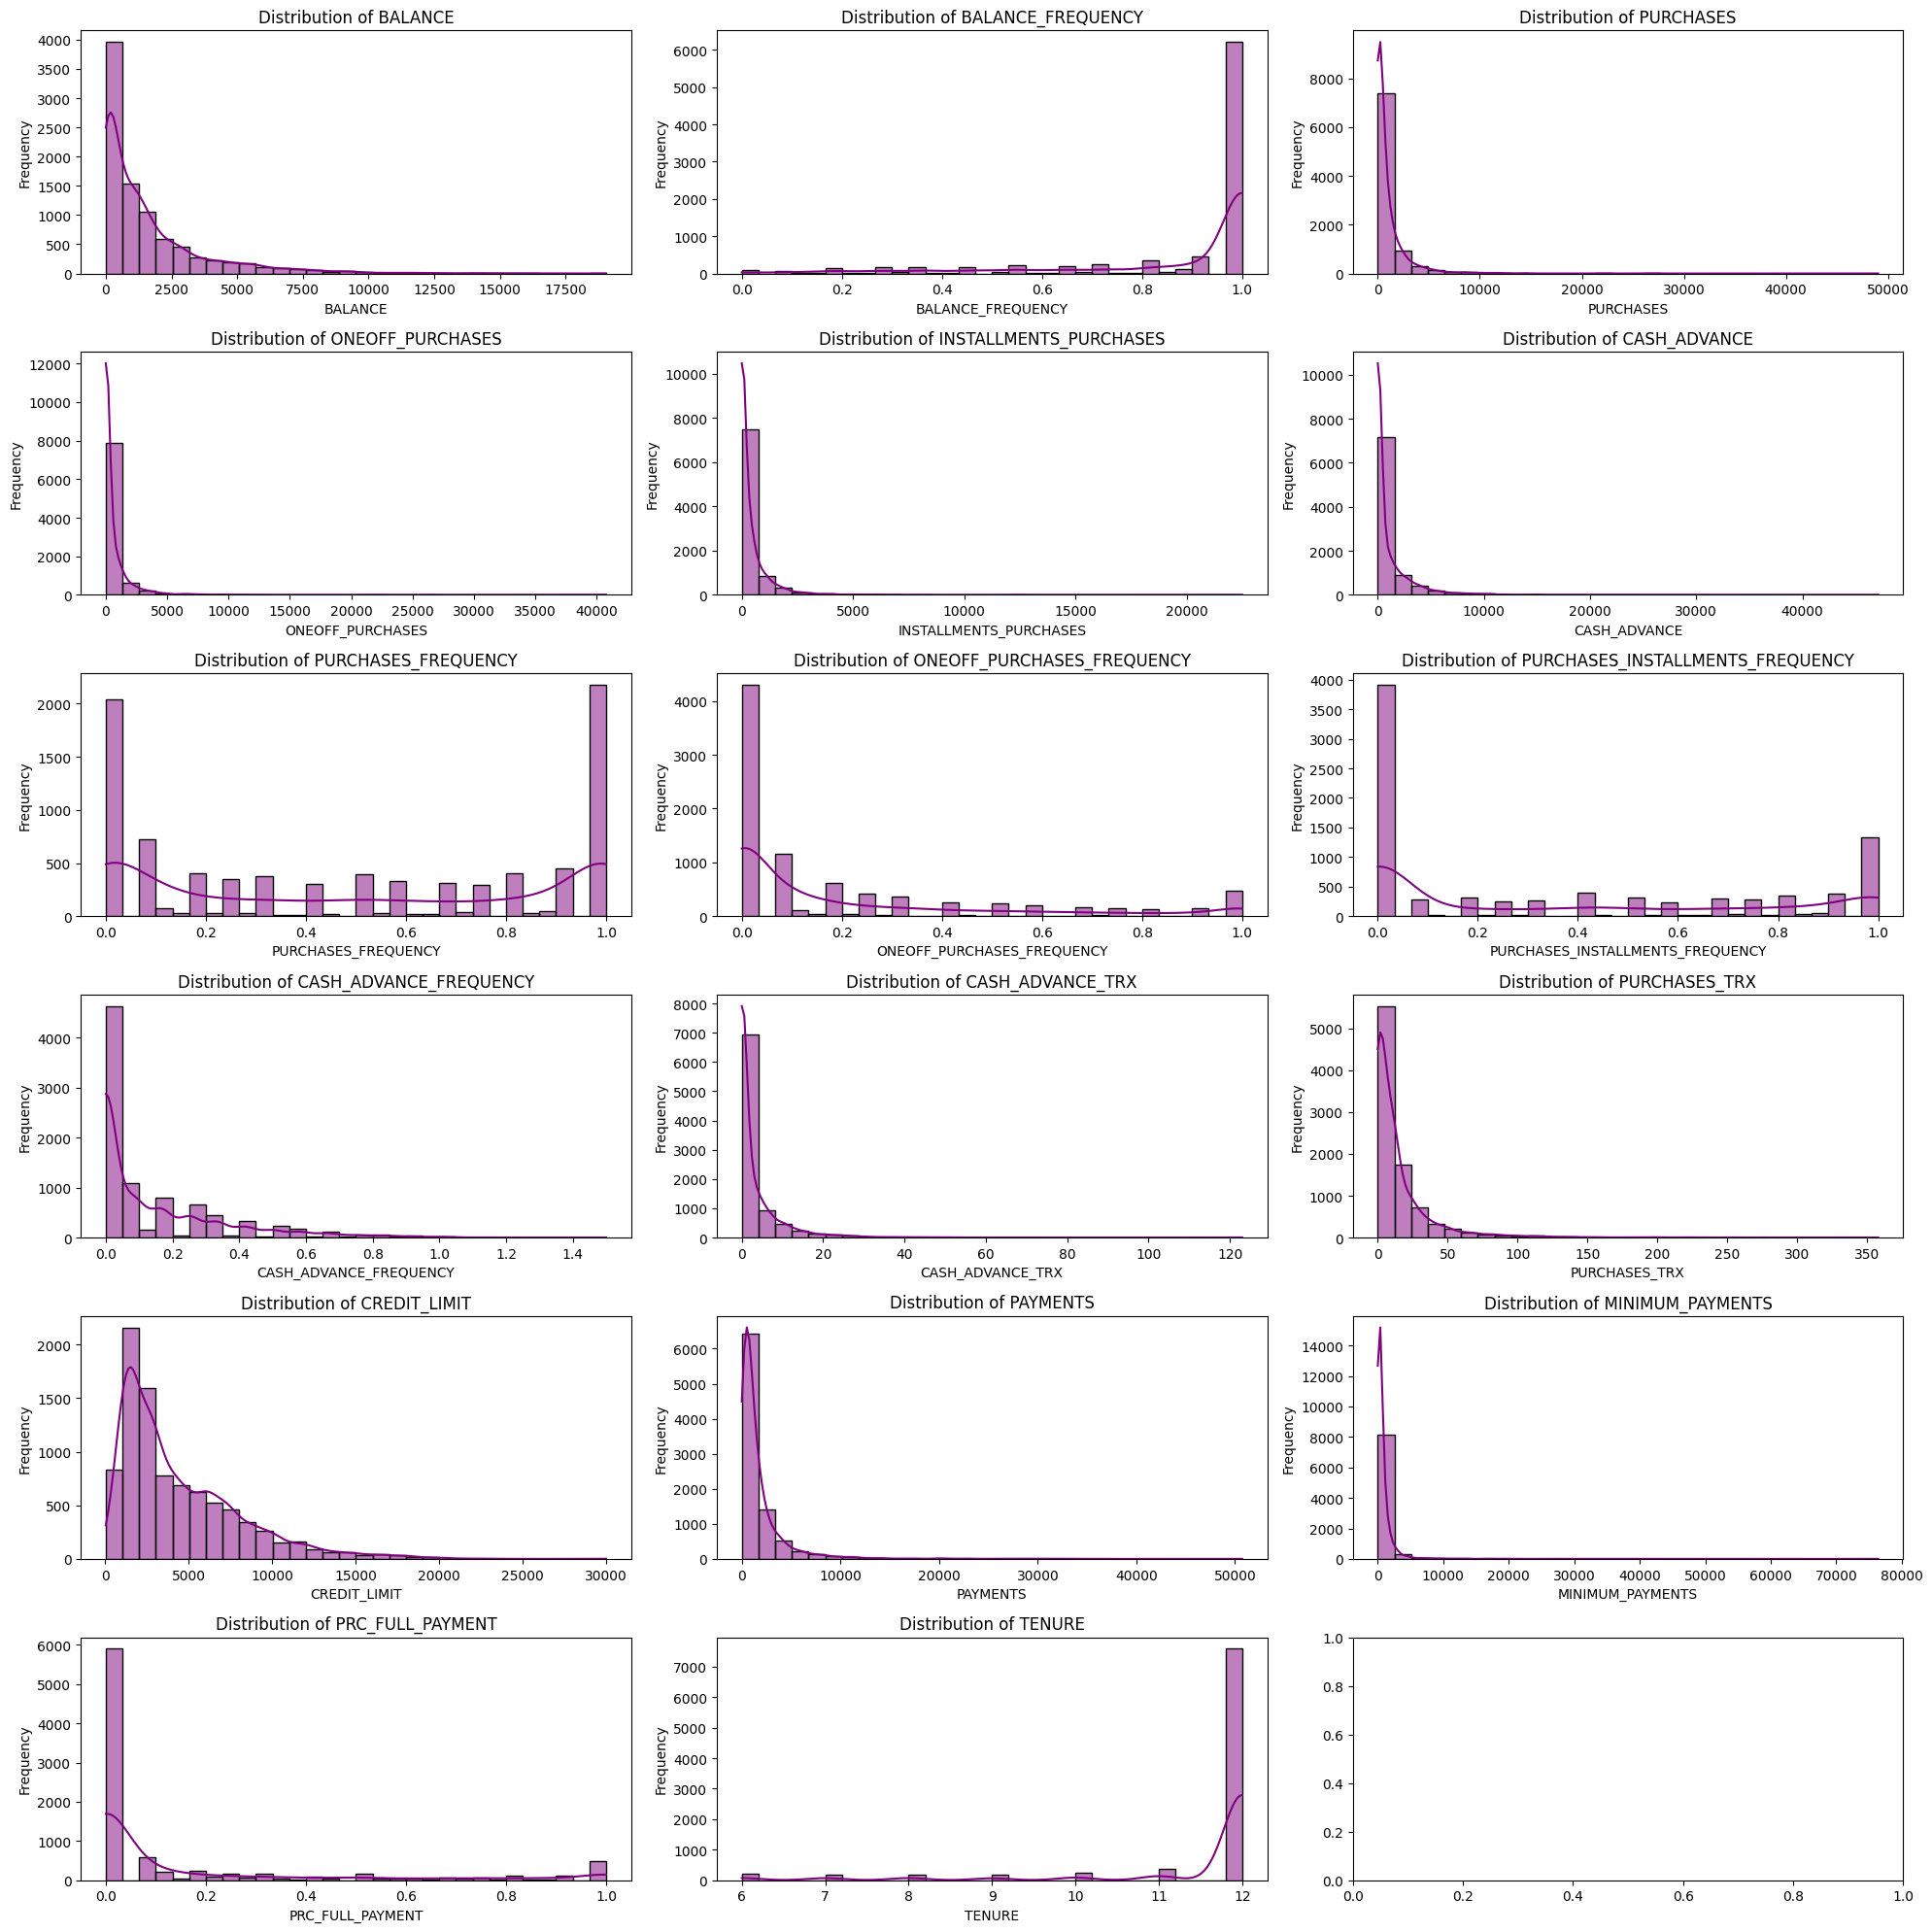

In [7]:
plt.figure(figsize=(16,8))
fig, ax = plt.subplots(6, 3, figsize=(20, 20))
ax = ax.flatten()
for i, col in enumerate(df.select_dtypes(include=['number']) ):
    sns.histplot(df[col], kde=True, bins=30 , ax=ax[i] , color='purple')
    ax[i].set_title(f'Distribution of {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

## Pair Plot for Relationships (Multivariate EDA)  
This pair plot shows how number columns connect:  

- **Diagonal**: Each column’s spread (like `PURCHASES`). Most are small, with a few big values (e.g., `PURCHASES` up to 50,000).  
- **Lower Part (Dots)**: Pairs (like `PURCHASES` vs `BALANCE`). Most dots are near 0—people don’t spend or borrow much. Some far dots show big outliers.  
- **Upper Part**: Hidden to keep it clean.  

**Observation**:  
- `PURCHASES` vs `ONEOFF_PURCHASES`: Dots line up—they move together.  
- `BALANCE` vs `CREDIT_LIMIT`: Higher balance often means higher limit, but not always.  
- `CASH_ADVANCE` vs `PURCHASES`: Most don’t do both—dots stay near 0.  

**Actionable Insights**:  
- `PURCHASES` and `ONEOFF_PURCHASES` are too alike—maybe use just one.  
- Check far dots (like in `MINIMUM_PAYMENTS`)—are they mistakes?  
- Most values are small, so models might need help with big gaps.  

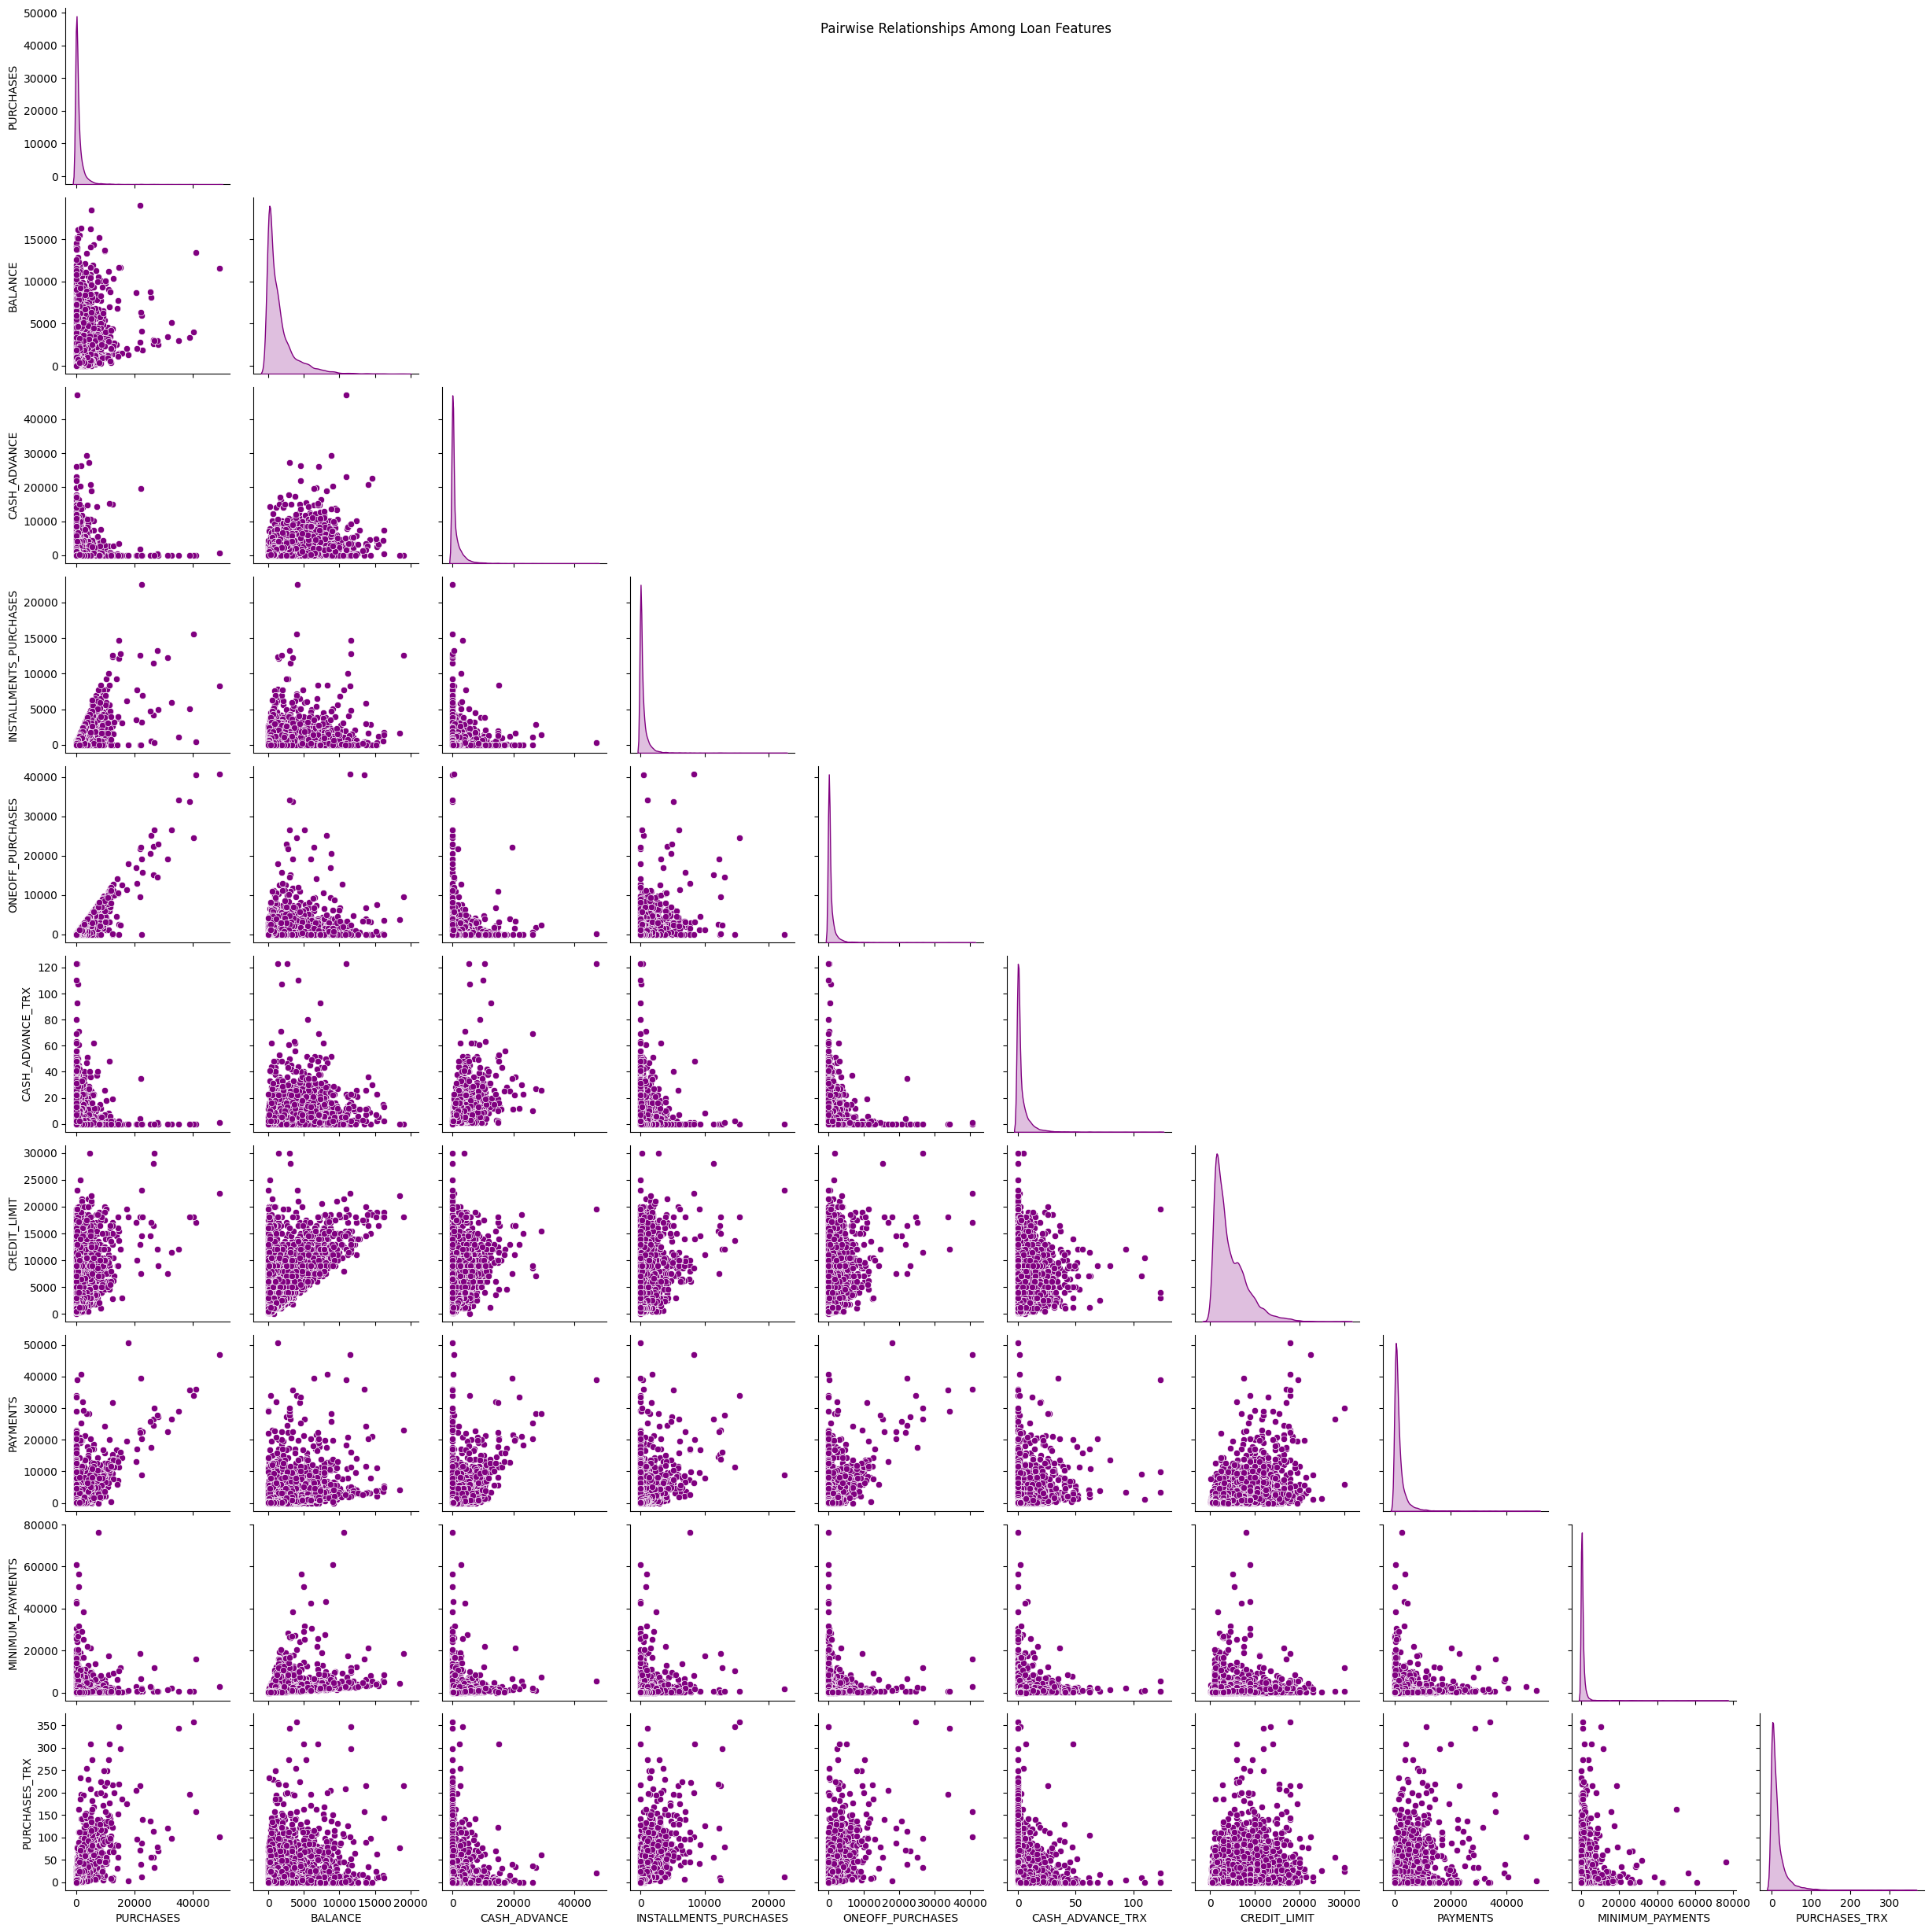

In [ ]:
selected_features = ['PURCHASES', 'BALANCE', 'CASH_ADVANCE' , 'INSTALLMENTS_PURCHASES' , 
                     'ONEOFF_PURCHASES' , 'CASH_ADVANCE_TRX' , 'CREDIT_LIMIT' , 'PAYMENTS' , 'MINIMUM_PAYMENTS' 
                      , 'PURCHASES_TRX']  
g = sns.pairplot(df[selected_features], diag_kind='kde' , plot_kws={'color': 'purple'},  
                 diag_kws={'color': 'purple'})

for i in range(len(selected_features)):
    for j in range(i + 1, len(selected_features)): 
        g.axes[i, j].set_visible(False)  

plt.suptitle("Pairwise Relationships Among Loan Features",)
plt.show()

## Key EDA Insights & Modeling Assumptions

#### Presence of Outliers
- Some features like **PURCHASES**, **CASH_ADVANCE**, and **MINIMUM_PAYMENTS** have very high values compared to others.
  - For example, **PURCHASES** goes up to 50,000, and **MINIMUM_PAYMENTS** reaches 80,000.
  - These values are much higher than most of the data and clearly stand out as **outliers**.

#### Skewed Distributions
- Many features are not spread evenly — most values are close to 0, and only a few are very large.
  - This **right-skewed** shape is clear in features like **PURCHASES** and **BALANCE**.
  - The data is **not normally distributed**.

#### High Correlation Between Features
- Some features move very closely together, indicating redundancy.
  - For example:
    - **PURCHASES** is highly related to **ONEOFF_PURCHASES** (correlation = 0.92).
    - **CASH_ADVANCE_TRX** is strongly linked to **CASH_ADVANCE_FREQUENCY** (correlation = 0.80).
  - This means they provide **similar information**.

#### Low Correlation Among Features
- Some features do not show a clear connection.
  - For example:
    - **CASH_ADVANCE** and **PURCHASES** do not follow a visible pattern.
    - **PRC_FULL_PAYMENT** also shows weak correlation with other variables like **BALANCE**.

#### Feature Engineering Opportunities
- Some features seem to work together in interesting ways, suggesting potential for new feature creation.
  - For example:
    - **PURCHASES** and **PURCHASES_TRX** together might show how often people spend.
  - This suggests we can create **new features** to better understand customer behavior.

#### Customer Behavior Patterns
- Most customers exhibit specific spending patterns:
  - Most customers have very low spending, with **PURCHASES** near zero.
  - Many customers also have the highest **TENURE** value, which is 12 months.
  - This indicates that many customers are **long-term** but do not spend much.